# Data analysis
Let's try to find some patterns in the data!

* Length of the text
* Amount of misspell
* Amount of swear words
* Laughs


### 1.1 importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [2]:
full_dataset3 = pd.read_csv('datasets\\full_dataset_3.csv')

### 1.2 preprocessing text

In [3]:
def removing_links(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    return text

def cleaning_data(text):
    text = re.sub(r'[0-9]', '', text)
    text = re.sub(r'rt+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[\"!$%-*&’‘*+”“,-./\[\]<=>\'?():;^_`<>{|}~#@]', '', text)
    return text

def preprocessing(text):
    text = removing_links(text)
    text = cleaning_data(text)
    return text


In [4]:
full_dataset3['text_removing_links'] = full_dataset3['text'].apply(removing_links)
full_dataset3['text_preproc'] = full_dataset3['text'].apply(preprocessing)

## 2. Length of the text

<AxesSubplot:xlabel='hate_speech', ylabel='length'>

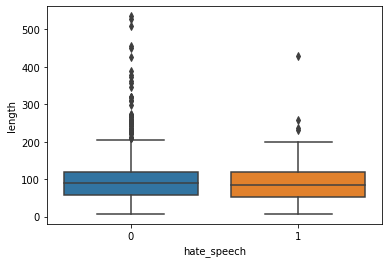

In [5]:
full_dataset3['length'] = full_dataset3['text_removing_links'].apply(len)
sns.boxplot(x='hate_speech', y='length', data=full_dataset3)

In [6]:
hate_0 = full_dataset3[full_dataset3.hate_speech==0]
hate_1 = full_dataset3[full_dataset3.hate_speech==1]

In [7]:
global_med = np.median(full_dataset3['length'])

c0_med = np.median(hate_0['length'])
c1_med = np.median(hate_1['length'])

w = hate_0[hate_0['length'] > global_med]
z = hate_1[hate_1['length'] > global_med]

print('Class 0 info: ')
print(hate_0['length'].describe())
print('\nClass 1 info: ')
print(hate_0['length'].describe())

print('\nmedian length of all texts is {:2.2f}'.format(global_med))
print('median length of class 0 text is {:2.2f}'.format(c0_med))
print('{:.2f}% of the elements in class 0 are above average in length'.format(100*len(w)/len(hate_0)))
print('median length of class 1 text is {:2.2f}'.format(c1_med))
print('{:.2f}% of the elements in class 1 are above average in length'.format(100*len(z)/len(hate_1)))

Class 0 info: 
count    5271.000000
mean       90.336748
std        42.612141
min         7.000000
25%        58.000000
50%        90.000000
75%       118.000000
max       535.000000
Name: length, dtype: float64

Class 1 info: 
count    5271.000000
mean       90.336748
std        42.612141
min         7.000000
25%        58.000000
50%        90.000000
75%       118.000000
max       535.000000
Name: length, dtype: float64

median length of all texts is 88.00
median length of class 0 text is 90.00
50.73% of the elements in class 0 are above average in length
median length of class 1 text is 84.00
47.06% of the elements in class 1 are above average in length


## 2. Amount of misspell

In [8]:
from spellchecker import SpellChecker
spell = SpellChecker(language='pt')

In [9]:
def count_misspell(text):
    text = text.split()
    unknown_res = []
    for word in text:
        unknown_res.append(spell.unknown([word]) != set())
    return unknown_res.count(True)

<AxesSubplot:xlabel='hate_speech', ylabel='count_misspell'>

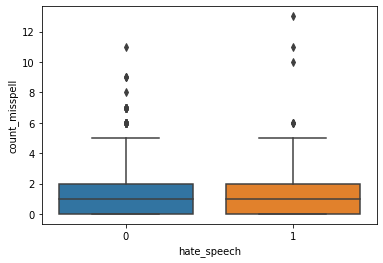

In [10]:
full_dataset3['count_misspell'] = full_dataset3['text_preproc'].apply(count_misspell)
sns.boxplot(x='hate_speech', y='count_misspell', data=full_dataset3)

In [18]:
hate_0 = full_dataset3[full_dataset3.hate_speech==0]
hate_1 = full_dataset3[full_dataset3.hate_speech==1]

w = hate_0[hate_0.count_misspell > 0]
z = hate_1[hate_1.count_misspell > 0]

print('{:.2f}% of elements in class 0 contains misspell'.format(len(w)/len(hate_0)*100))
print('{:.2f}% of elements in class 1 contains misspell'.format(len(z)/len(hate_1)*100))

59.46% of elements in class 0 contains misspell
62.24% of elements in class 1 contains misspell


## 3. Amount of swear words

In [12]:
f = open("datasets\\lista-palavroes-bloqueio.txt", "r", encoding="utf8")
list_swear_words = f.readlines()
list_swear_words = [x.strip() for x in list_swear_words]
f.close()

def count_swear_words(text):
    swear = []
    text = text.split(' ')
    for swear_word in list_swear_words:
        try:
            x = [re.findall('^' + swear_word.lower(), word) for word in text]
            x = [y for y in x if y != []]
            if x != []:
                swear.append(x[0][0])
        except:
            pass
    return len(swear)

<AxesSubplot:xlabel='hate_speech', ylabel='swear_words'>

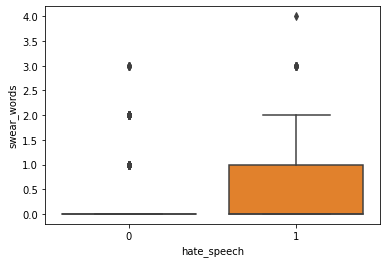

In [13]:
full_dataset3['swear_words'] = full_dataset3['text'].apply(count_swear_words)
sns.boxplot(x='hate_speech', y='swear_words', data=full_dataset3)

In [14]:
hate_0 = full_dataset3[full_dataset3.hate_speech==0]
hate_1 = full_dataset3[full_dataset3.hate_speech==1]

w = hate_0[hate_0.swear_words > 0]
z = hate_1[hate_1.swear_words > 0]

print('{:.2f}% of elements in class 0 contains swear words'.format(len(w)/len(hate_0)*100))
print('{:.2f}% of elements in class 1 contains swear words'.format(len(z)/len(hate_1)*100))

8.40% of elements in class 0 contains swear words
43.43% of elements in class 1 contains swear words


## 4. Presence of laughs

In [15]:
laughs = "k{2,}|a*ha+h[ha]*|e*he+h[he]*|s*rs+r[rs]*" # get regex for laughs
def thereis_laughs(text):
    if re.findall(laughs, text): return True
    else: return False

In [16]:
full_dataset3['laughs'] = full_dataset3['text'].apply(thereis_laughs)

In [17]:
hate_0 = full_dataset3[full_dataset3.hate_speech==0]
hate_1 = full_dataset3[full_dataset3.hate_speech==1]

w = hate_0[hate_0['laughs'] == True]
z = hate_1[hate_1['laughs'] == True]

print('{:.2f}% of the elements in class 0 have laughs'.format(100*len(w)/len(hate_0)))
print('{:.2f}% of the elements in class 1 have laughs'.format(100*len(z)/len(hate_1)))

3.62% of the elements in class 0 have laughs
4.13% of the elements in class 1 have laughs
